# How to initialize the flags, parameters and plot EFTmodels using pyEFTCAMB

## A notebook for EFTflag = 0/1, the GR and Pure EFT case

In [1]:
# initial imports:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import EFTCAMB directly from local folder, if you compile in your own direction, pay attention to change the camb_installation_path to your installation path.

In [2]:
camb_installation_path = './../' 
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)
print('camb path:', camb_path)
import camb
# camb.set_feedback_level(1)
from camb import model, initialpower

camb path: /Users/linshijie/Desktop/research/CodeGithub/H-eftcamb-debug


### CHOOSE EFT MODEL FLAG for STABILITY check 
In this and all other modle notebooks, we focus on introducing the flags and parameters, so we ignore all the stability tests. The XXXXX.ipynb shows the impact of stability test.
#### Flags and their default value are  (note, this are setted by default in EFTCAMB) :
   - EFT_ghost_math_stability  = False
   - EFT_mass_math_stability  = False
   - EFT_ghost_stability  = True
   - EFT_gradient_stability  = True
   - EFT_mass_stability  = False
   - EFT_mass_stability_rate  = 10.0
   - EFT_additional_priors  = True

### These are other flags that can be set for the stability check (always on default in the examples)

   - EFTCAMB_feedback_level = 1
   - EFTCAMB_turn_on_time = 0.01
   - EFTCAMB_stability_time = 1e-10
   - EFTCAMB_stability_threshold = 0.0
   - EFTCAMB_model_is_designer = True

In [3]:
# Turn off all the stability checks firstly
stability_flag ={
                'feedback_level' : 3,        # The level of feedback from EFTCAMB, 3 is the most verbose
                'EFT_ghost_math_stability'   : False,
                'EFT_mass_math_stability'    : False,
                'EFT_ghost_stability'        : True,
                'EFT_gradient_stability'     : True,
                'EFT_mass_stability'         : False,
                'EFT_additional_priors'      : False,
                }

## CHOOSE EFT MODEL: 
### The main flag is EFTflag 

- EFTflag = 0 -> GR, standard CAMB code. For GR case, do not set anything.


In [4]:
GR_params = {'EFTflag':0
            }


- **EFTflag** = 1 -> pureEFT: use some parametrized forms of the EFT functions ($\gamma$ functions)
  Eventually one can also change the value today and the scaling exponent of the $\gamma$ functions. 
  
    - Flag for different $w_{DE}$ parametrizations (LCDM, wCDM, CPL, JBL, Taylor or TurningPoint): **EFTwDE**.
        - **EFTwDE**&emsp;  = 0&emsp; ->&emsp; $w_{DE} = -1$
        - **EFTwDE**&emsp;  = 1&emsp; ->&emsp; $w_{DE} = w_0$
        - **EFTwDE**&emsp;  = 2&emsp; ->&emsp; $w_{DE} = w_0 + w_a(1-a)$
        - **EFTwDE**&emsp;  = 3&emsp; ->&emsp; $w_{DE} = w_0 + w_a (1-a) a^{(n-1)}$
        - **EFTwDE**&emsp;  = 4&emsp; ->&emsp; $w_{DE} = w_0 + w_a (a_t-a)^2$
        - **EFTwDE**&emsp;  = 5&emsp; ->&emsp; $w_{DE} = w_0 + w_a a + \frac12 w_2 a^2 + \frac16 w_3 a^3$
        
    
    The parameters above can be fixed with the flags:
     - $w_0$->**EFTw0** ,  $w_a$->**EFTwa** , $n$->**EFTwn**, $a_t$->**EFTwat** , $w_2$->**EFTw2** , $w_3$->**EFTw3**

    - Flags for $\Omega$ and $\gamma_i$ parametrizations (Constant, linear, power law or exponential):  **PureEFTmodelOmega** and **PureEFTmodelGamma1** 
         - **PureEFTmodelOmega** = 0&emsp; ->&emsp; $\Omega(a) = 0 $&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **PureEFTmodelGamma1** = 0&emsp; ->&emsp; $\gamma_1(a) = 0 $
         - **PureEFTmodelOmega** = 1&emsp; ->&emsp; $\Omega(a) = \Omega_0 $&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **PureEFTmodelGamma1** = 1&emsp; ->&emsp; $\gamma_1(a) = \gamma_1^0 $
         - **PureEFTmodelOmega** = 2&emsp; ->&emsp; $\Omega(a) = \Omega_0 a$&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **PureEFTmodelGamma1** = 2&emsp; ->&emsp; $\gamma_1(a) = \gamma_1^0 a$
         - **PureEFTmodelOmega** = 3&emsp; ->&emsp; $\Omega(a) = \Omega_0 a^s$ &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **PureEFTmodelGamma1** = 3&emsp; ->&emsp; $\gamma_1(a) = \gamma_1^0 a^s$
         - **PureEFTmodelOmega** = 4&emsp; ->&emsp; $\Omega(a) = \exp(\Omega_0 a^s) -1$  &emsp;&emsp;**PureEFTmodelGamma1** = 4&emsp; ->&emsp; $\gamma_1(a) = \exp(\gamma_1^0 a^s) -1$

     and similar for the other $\gamma_i$ functions. The flags to choose the last parameters are: 
      - $\Omega_0$-> **EFTOmega0** , $s$ -> **EFTOmegaExp** 
      - $\gamma^0_1$ -> **EFTGamma10** , $s$ -> **EFTGamma1Exp** 
         
     
         

### Now we first use parametrizations on $w_{DE}$ with CPL model, and Power Law model for $\Omega, \gamma_1$ as an example

In [5]:
pureEFT_params= {'EFTflag':1,
                 'PureEFTmodel':1,
                 'EFTwDE':11, 
                 'PureEFTmodelOmega':1, 'EFTOmega0':0.1,
                 'PureEFTmodelGamma1':0,
                 'PureEFTmodelGamma2':0,
                 'PureEFTmodelGamma3':0,
                 'PureEFTmodelGamma4':0,
                 'PureEFTmodelGamma5':0,
                 'PureEFTmodelGamma6':0,
                 }
pureEFT_params.update(stability_flag)

## Store the models in a multiple dictionary (Recommended).
Models can be called by the dict.get() method. A default model dict can be created, and then the user can update it through the usual dict methods. 


In [6]:
model_key = ['GR', 'PureEFT'] 
model_par = [GR_params, pureEFT_params]
Model = dict(zip(model_key,model_par))    # dictionary with the models, be careful for differring from camb.model

You can set and get the basic cosmo parameters for models like the camb.

Setting the EFT parameters, please use set_params function.

In [7]:
pars_GR = camb.set_params(H0=67.3, **Model['GR']) 
print(pars_GR.H0)
pars_pureEFT = camb.set_params(H0=67.3, **Model['PureEFT'])
# Also for all the parameters and flags inplemented in EFTcamb
print(pars_pureEFT.H0)

67.3
***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan26
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           3
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  F
  Positivity bounds      =  F
  Minkowski limi

#### If you want to get the input parameters for the EFTCAMB, please use #ModelName#.EFTCAMB.read_parameters()

In [8]:
EFTpars_pureEFT = pars_pureEFT.EFTCAMB.read_parameters()
print('All params: ',EFTpars_pureEFT)
print('The Main Flag: ',EFTpars_pureEFT['EFTflag'])
print('The Flag of PureEFTmodel: ',EFTpars_pureEFT['PureEFTmodel'])
print('The Flag of EFTwDE: ',EFTpars_pureEFT['EFTwDE'])
print('The Flag of PureEFTmodelOmega: ',EFTpars_pureEFT['PureEFTmodelOmega'])
print('The Flag of PureEFTmodelGamma1: ',EFTpars_pureEFT['PureEFTmodelGamma1'])

All params:  {'EFTflag': 1, 'PureEFTmodel': 1, 'EFT_ghost_math_stability': False, 'EFT_mass_math_stability': False, 'EFT_ghost_stability': True, 'EFT_gradient_stability': True, 'EFT_mass_stability': False, 'EFT_mass_stability_rate': 10.0, 'EFT_additional_priors': False, 'EFT_positivity_bounds': False, 'EFT_minkowski_limit': False, 'feedback_level': 3, 'EFTCAMB_back_turn_on': 1e-08, 'EFTCAMB_turn_on_time': 0.01, 'EFTCAMB_GR_threshold': 1e-08, 'EFTCAMB_stability_time': 1e-10, 'EFTCAMB_stability_threshold': 0.0, 'EFTCAMB_effective_w0wa': False, 'EFTCAMB_use_background': False, 'EFTCAMB_evolve_delta_phi': False, 'EFTCAMB_evolve_metric_h': False, 'EFTCAMB_skip_stability': False, 'EFTCAMB_skip_RGR': False, 'PureEFTmodelOmega': 1, 'EFTwDE': 11, 'PureEFTmodelGamma1': 0, 'PureEFTmodelGamma2': 0, 'PureEFTmodelGamma3': 0, 'PureEFTmodelGamma4': 0, 'PureEFTmodelGamma5': 0, 'PureEFTmodelGamma6': 0, 'PureEFTmodelOmega_ODE': 0, 'PureEFTmodelGamma1_ODE': 0, 'PureEFTmodelGamma2_ODE': 0, 'PureEFTmodelGam

#### See how many extra parameters you have, how they are called and their values:

In [9]:
pars_pureEFT.EFTCAMB.num_params()
print(pars_pureEFT.EFTCAMB.param_names())
print(pars_pureEFT.EFTCAMB.param_labels())
print(pars_pureEFT.EFTCAMB.param_values())

['EFTOmega0', 'EFTw0', 'EFTw1']
['EFTOmega_0', 'EFTw_0', 'EFTw_1']
[0.1, 0.0, 0.0]


# Move to get some results

#### First, let's see some background functions

In [10]:
bkresults_GR = camb.get_background(pars_GR)
bkresults_pureEFT = camb.get_background(pars_pureEFT)
print('The age of the universe for GR: ', bkresults_GR.get_derived_params()['age'])
print('The age of the universe for PureEFT: ', bkresults_pureEFT.get_derived_params()['age'])
print('CosmoMC theta_MC parameter for GR:',bkresults_GR.cosmomc_theta())
print('CosmoMC theta_MC parameter for PureEFT:',bkresults_pureEFT.cosmomc_theta())

***************************************************************
 EFTCAMB designer pure EFT background solver

***************************************************************
 EFTCAMB Return to GR time:        0.1000E-01
 EFTCAMB Return to GR threshold:   0.1000E-07
 Warning, RGR time and turn on time coincide.
 The model might be far from GR at initial time.

 EFT functions at RGR time: 
   OmegaV       =    0.1000E+00
   EFTc         =    0.5943E-01
   EFTLambda    =    0.4472E-04
   EFTcdot      =    0.4021E-03
   EFTLambdadot =    0.4067E-06
***************************************************************
 EFTCAMB: checking stability of the theory

 EFTCAMB: theory stable
***************************************************************
The age of the universe for GR:  13.812291011516189
The age of the universe for PureEFT:  9.684898156221154
CosmoMC theta_MC parameter for GR: 0.01041714773853369
CosmoMC theta_MC parameter for PureEFT: 0.011897887513755095


***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan26
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           3
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  F
  Positivity bounds      =  F
  Minkowski limit    

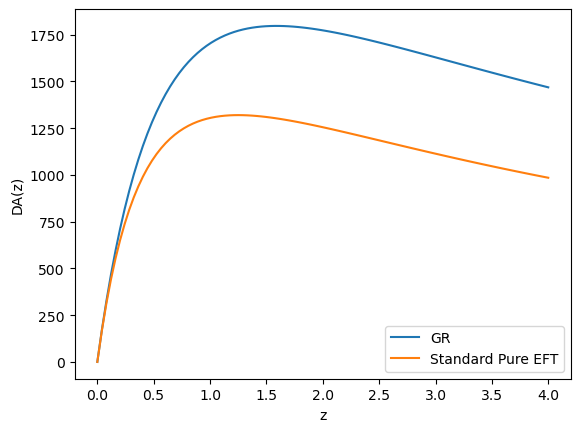

In [11]:
z = np.linspace(0,4,100)
labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()

#### Second, give the CMB Cls.

In [12]:
toplot_totCL = []
for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    Cls =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    totCL=Cls['total']
    # unlensedCL=Cls['unlensed_scalar']
    toplot_totCL.append(totCL)
    

***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan26
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           3
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  F
  Positivity bounds      =  F
  Minkowski limit    

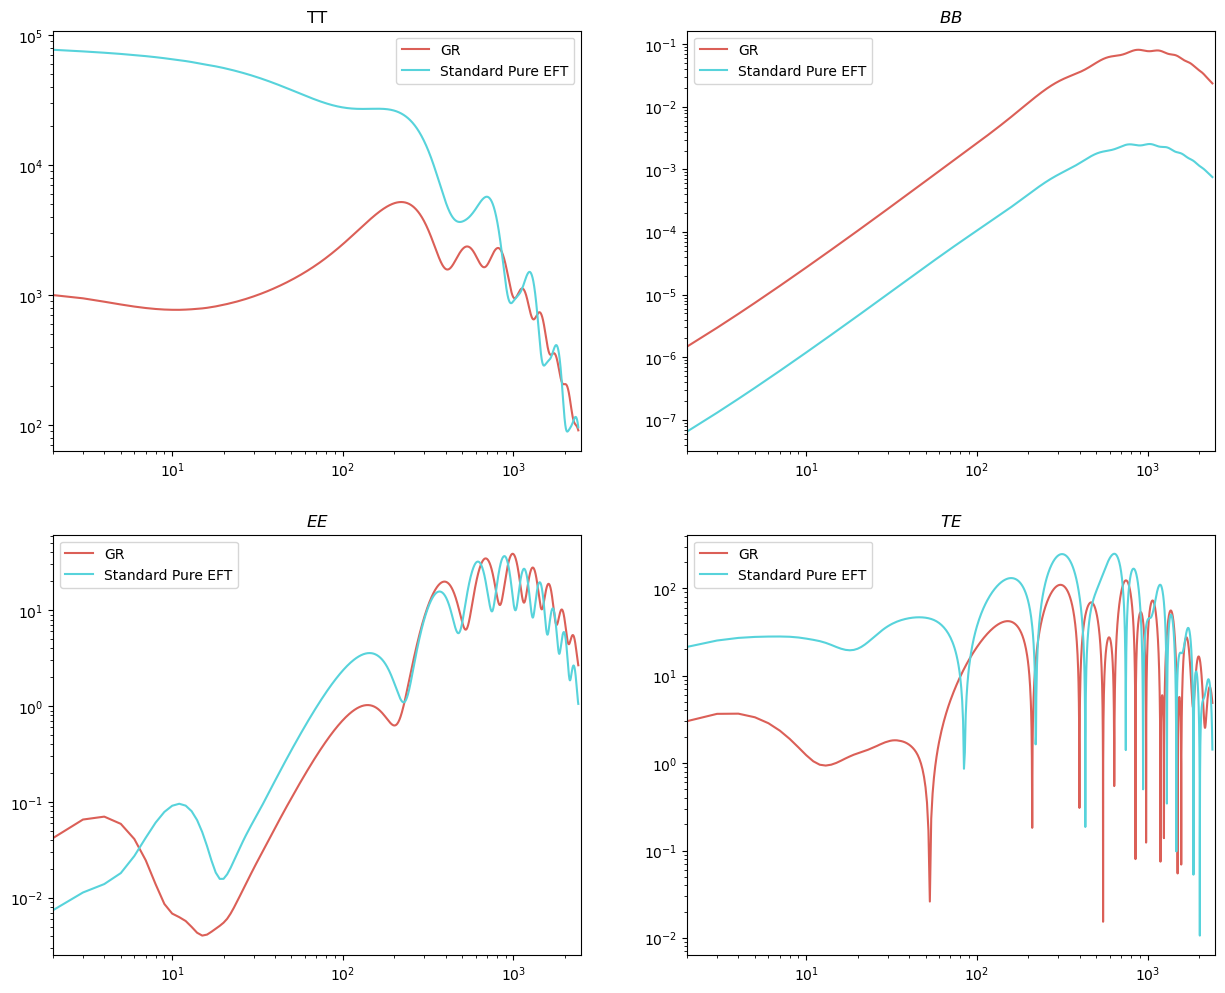

In [13]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results)

fig, ax = plt.subplots(2,2, figsize = (15,12))
color = sns.hls_palette(len(Model))

for CLS,c,lab in zip(toplot_totCL,color,labs):
    
    ls = np.arange(CLS.shape[0])
    ax[0,0].loglog(ls,CLS[:,0], color=c,label=lab)
    ax[0,1].loglog(ls,CLS[:,2], color=c,label=lab)
    ax[1,0].loglog(ls,CLS[:,1], color=c,label=lab)
    ax[1,1].loglog(ls,abs(CLS[:,3]), color=c,label=lab)
    ax[0,0].set_title('TT')
    ax[0,1].set_title(r'$BB$')
    ax[1,0].set_title(r'$EE$')
    ax[1,1].set_title(r'$TE$');

ax[1,0].legend()
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].legend()

for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

#### Third, let's see the power spectrum.
Now, non-linear is not the case for the EFT theory.

In [14]:
toplot_matter_kh = []
toplot_matter_pk = []

for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key])
    pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
    pars.NonLinear = model.NonLinear_none         # linear power spectrum
    results = camb.get_results(pars)

    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200, params = pars) 
  
    toplot_matter_kh.append(kh)
    toplot_matter_pk.append(pk[0])

Note: redshifts have been re-sorted (earliest first)
***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan26
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           3
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  

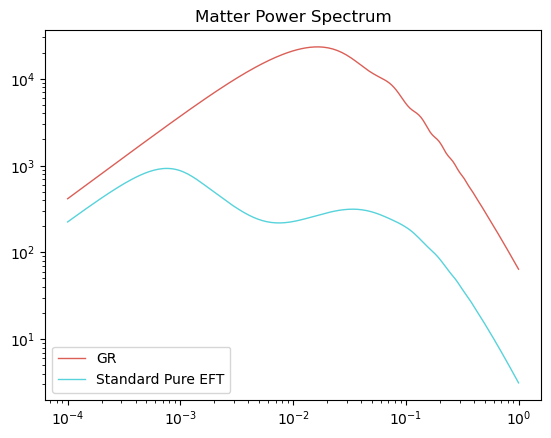

In [15]:
color = sns.hls_palette(2)

for KH, PK, c, key in zip(toplot_matter_kh, toplot_matter_pk, color, labs):
    plt.loglog(KH,PK, color=c,label=key,lw='1.0')
    plt.title(r'Matter Power Spectrum',fontsize=12)

plt.legend(fontsize=10)
plt.show()

#### Besides, you can also get the time/scale evolution of some values by #ModelName#.EFTCAMB.get_scale_evolution() function. 

All the parameters you can get are listed in "../find_your_model/Sclae Evolution". The mathematical description of them please see in the Numerical Notes.

In [16]:
a_vec = np.logspace(-1.9,0, num=200)
toplot_phi = []
toplot_mu = []
toplot_sgm = []
for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    nms, vls = pars.EFTCAMB.get_scale_evolution(results, 0.1, a_vec)

    toplot_phi.append(vls['phi_scf'][0])
    toplot_mu.append(vls['mu'][0])
    toplot_sgm.append(vls['sigma_eft'][0])

***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan26
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           3
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  F
  Positivity bounds      =  F
  Minkowski limit    

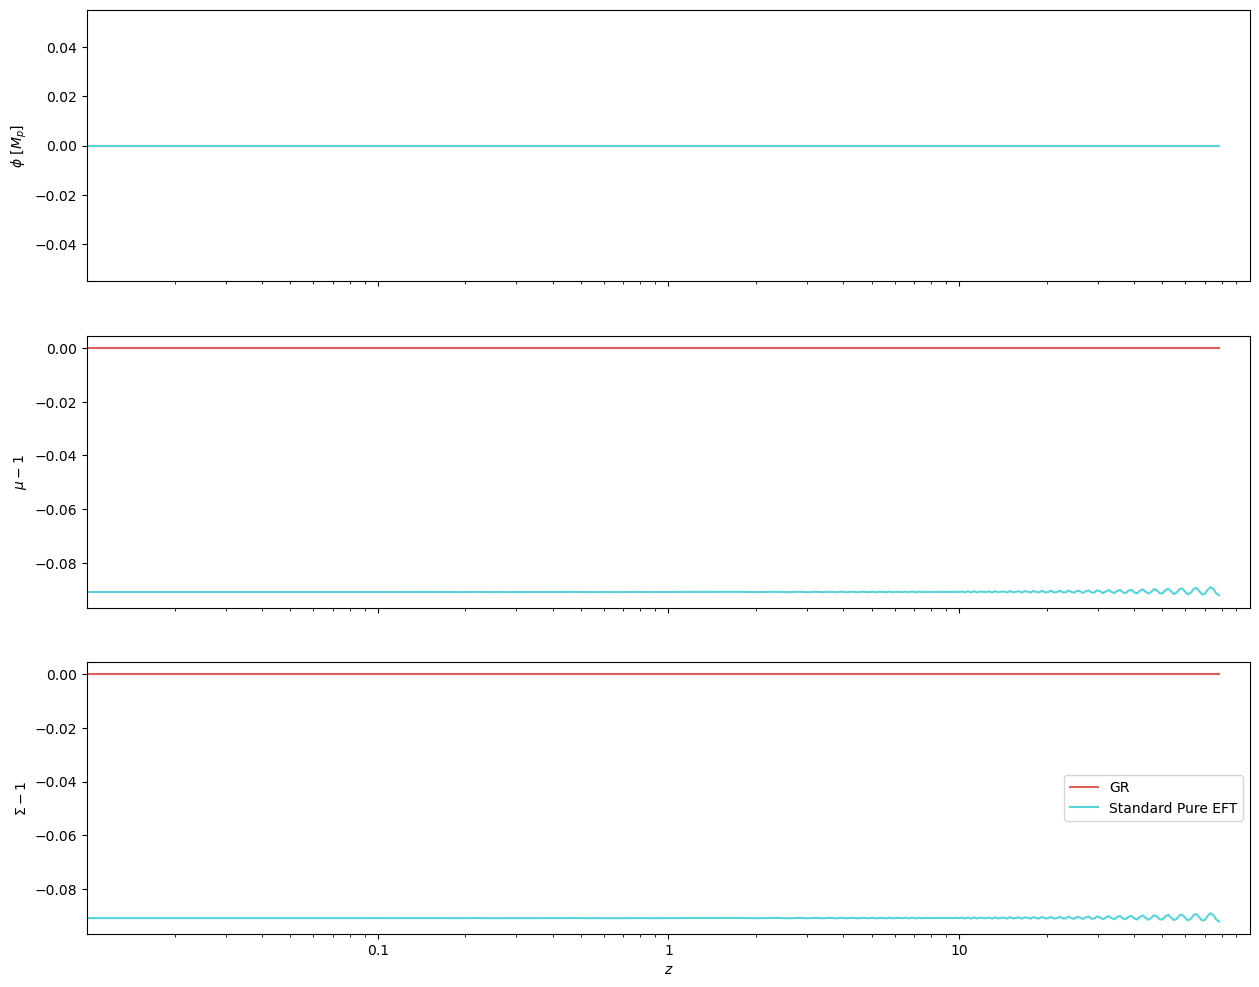

In [17]:
fig, ax = plt.subplots(3,1, figsize = (15,12),sharex=True)
color = sns.hls_palette(len(Model))

for phi, mu, sgm, c, key in zip(toplot_phi, toplot_mu, toplot_sgm, color, labs):
    
    ax[0].plot(1/a_vec-1, phi, color=c,label=key)
    ax[1].plot(1/a_vec-1, mu-1, color=c,label=key)
    ax[2].plot(1/a_vec-1, sgm-1, color=c,label=key)

    ax[0].set_ylabel(r'$\phi \ [M_p]$')
    ax[1].set_ylabel(r'$\mu - 1$')
    ax[2].set_ylabel(r'$\Sigma - 1$')


ax[2].set_xlabel(r'$z$')
ax[2].set_xlim([1e-2,1e2])
ax[2].set_xscale('log')
# ax[2].set_xticks([0.1, 1, 10, 1e3, 3500, 1e5], [0.1, 1, 10, "$10^3$", r"$z_{\rm eq} = 3500$", "$10^5$"])
ax[2].set_xticks([0.1, 1, 10], [0.1, 1, 10])

plt.legend(fontsize=10)
plt.show()

### Examples with different background parametrizations in the pureEFT model

Since the "Spline" method involves an indeterminate number of parameters, EFTCAMB's tree search cannot function effectively. We recommend that users manually specify all required parameters.

In [18]:
#Set list of dictionaries varying the parametrization of background 
PureEFT_DE_model ={}

DE_lab = ['LCDM','wCDM','CPL','JBL','TurnPoint','TaylorExp']
DE_key = ['EFTw0','EFTwa','EFTwn','EFTwat', 'EFTw2', 'EFTw3'] 
DE_par = [-0.5, - 0.5, 2, 0.8, 0.1, 0.1]

for i,DE in zip(range(len(DE_lab)),DE_lab):
    if DE == 'LCDM':
        PureEFT_DE_model.update({DE : Model['GR'].copy()})     
    if DE == 'wCDM':
        PureEFT_DE_model.update({DE : Model['PureEFT'].copy()})
        PureEFT_DE_model[DE]['EFTwDE'] = i
        PureEFT_DE_model[DE]['PureEFTmodelOmega'] = 0
        PureEFT_DE_model[DE].pop('EFTOmega0') # remove unused parameter
        PureEFT_DE_model[DE].update(dict(zip([DE_key[0]], [DE_par[0]])))
    if DE == 'CPL':
        PureEFT_DE_model.update({DE : Model['PureEFT'].copy()})
        PureEFT_DE_model[DE]['EFTwDE'] = i
        PureEFT_DE_model[DE]['PureEFTmodelOmega'] = 0
        PureEFT_DE_model[DE].pop('EFTOmega0')
        PureEFT_DE_model[DE].update(dict(zip(DE_key[0:2],DE_par[0:2])))
    if DE == 'JBL':
        PureEFT_DE_model.update({DE : Model['PureEFT'].copy()})
        PureEFT_DE_model[DE]['EFTwDE'] = i
        PureEFT_DE_model[DE]['PureEFTmodelOmega'] = 0
        PureEFT_DE_model[DE].pop('EFTOmega0')
        PureEFT_DE_model[DE].update(dict(zip(DE_key[0:3],DE_par[0:3])))
    if DE == 'TurnPoint':
        PureEFT_DE_model.update({DE : Model['PureEFT'].copy()})
        PureEFT_DE_model[DE]['EFTwDE'] = i
        PureEFT_DE_model[DE]['PureEFTmodelOmega'] = 0
        PureEFT_DE_model[DE].pop('EFTOmega0')
        PureEFT_DE_model[DE].update(dict(zip([DE_key[0], DE_key[1], DE_key[3]],[DE_par[0], DE_par[1], DE_par[3]])))
    if DE == 'TaylorExp':
        PureEFT_DE_model.update({DE : Model['PureEFT'].copy()})
        PureEFT_DE_model[DE]['EFTwDE'] = i
        PureEFT_DE_model[DE]['PureEFTmodelOmega'] = 0
        PureEFT_DE_model[DE].pop('EFTOmega0')
        PureEFT_DE_model[DE].update(dict(zip([DE_key[0], DE_key[1], DE_key[4], DE_key[5]],[DE_par[0], DE_par[1], DE_par[4], DE_par[5]])))

## Effects on angular diameter distance and luminosity distance

***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan26
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           3
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  F
  Positivity bounds      =  F
  Minkowski limit    

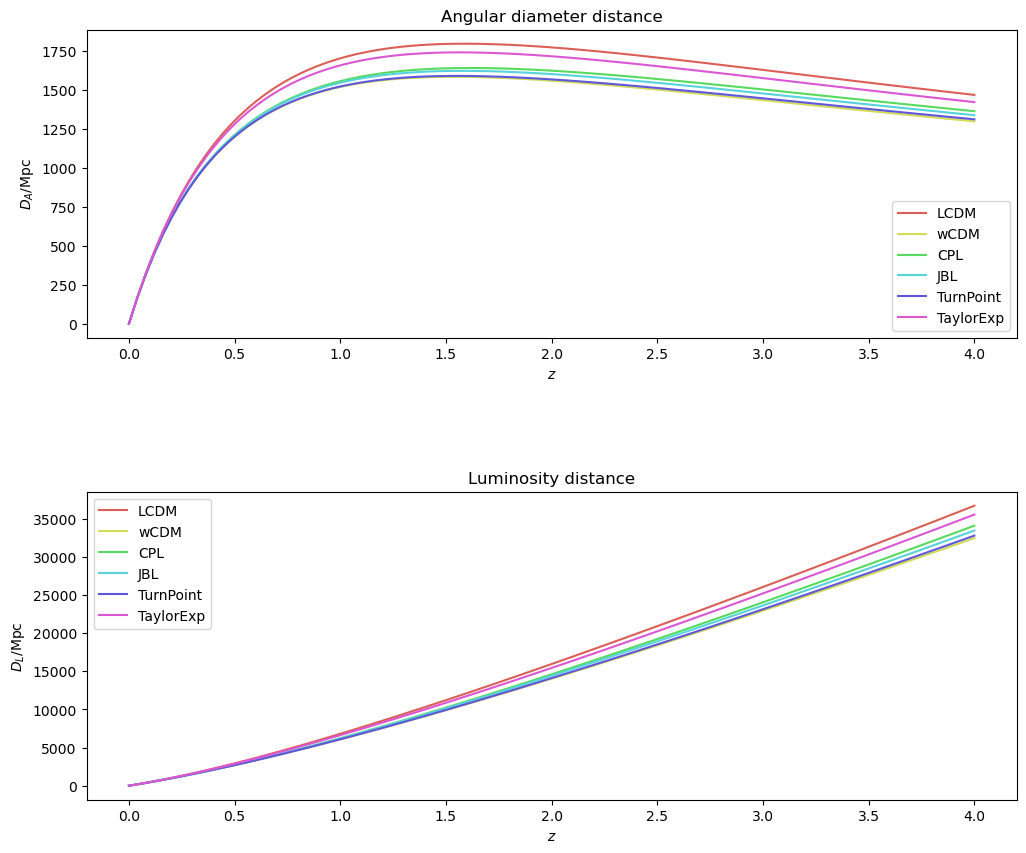

In [19]:
color = sns.hls_palette(len(PureEFT_DE_model))
fig, ax = plt.subplots(2,1, figsize = (12,10))
z = np.linspace(0,4,100)
plt.subplots_adjust(hspace=0.5)

for EFTpar, name,c in zip(PureEFT_DE_model, DE_lab,color):
    EFT = camb.set_params(H0=67.3, **PureEFT_DE_model[EFTpar])
    EFTbg = camb.get_background(EFT)
    DA = EFTbg.angular_diameter_distance(z)
    DL = EFTbg.luminosity_distance(z)
    ax[0].plot(z, DA,c=c, label = name)
    ax[1].plot(z, DL,c=c, label = name)
    
ax[1].set_xlabel('$z$')
ax[1].set_ylabel(r'$D_L /\rm{Mpc}$')
ax[1].set_title('Luminosity distance')
ax[0].set_xlabel('$z$')
ax[0].set_ylabel(r'$D_A /\rm{Mpc}$')
ax[0].set_title('Angular diameter distance')
ax[1].legend()
ax[0].legend()    

### Effects on matter power spectrum and CMB temperature anisotropies

In [20]:
#Set list of things to plot 
toplot_totCL_DE = []
toplot_matter_DE_kh = []
toplot_matter_DE_pk = []

for EFTpar in PureEFT_DE_model:
    
    # EFT1 = camb.CAMBparams()
    # EFT1.set_cosmology(H0=67.3, EFTCAMB_params=PureEFT_DE_model[EFTpar])
    # print('EFTpar:',EFTpar)
    EFT1 = camb.set_params(H0=67.3, **PureEFT_DE_model[EFTpar])
    EFT1.NonLinear = model.NonLinear_none
    results1 = camb.get_results(EFT1)
    powers =results1.get_cmb_power_spectra(EFT1, CMB_unit='muK')
    
    EFT1.set_matter_power()
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200, params = EFT1) 

    totCL = powers['total']
    toplot_totCL_DE.append(totCL)
    toplot_matter_DE_kh.append(kh)
    toplot_matter_DE_pk.append(pk[0])
    

***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan26
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           3
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  F
  Positivity bounds      =  F
  Minkowski limit    

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\ '
/var/folders/dq/m04kq7791tz0qw0bp82s7cn40000gn/T/ipykernel_51472/1749406639.py:8: SyntaxWarning: invalid escape sequence '\e'
  ax[0].set_title('$C_{\ell}^{TT}$',pad=5)
/var/folders/dq/m04kq7791tz0qw0bp82s7cn40000gn/T/ipykernel_51472/1749406639.py:10: SyntaxWarning: invalid escape sequence '\e'
  ax[0].set_xlabel('$\ell$')
/var/folders/dq/m04kq7791tz0qw0bp82s7cn40000gn/T/ipykernel_51472/1749406639.py:11: SyntaxWarning: invalid escape sequence '\ '
  ax[1].set_xlabel('$k\ [Mpc^{-1}]$')


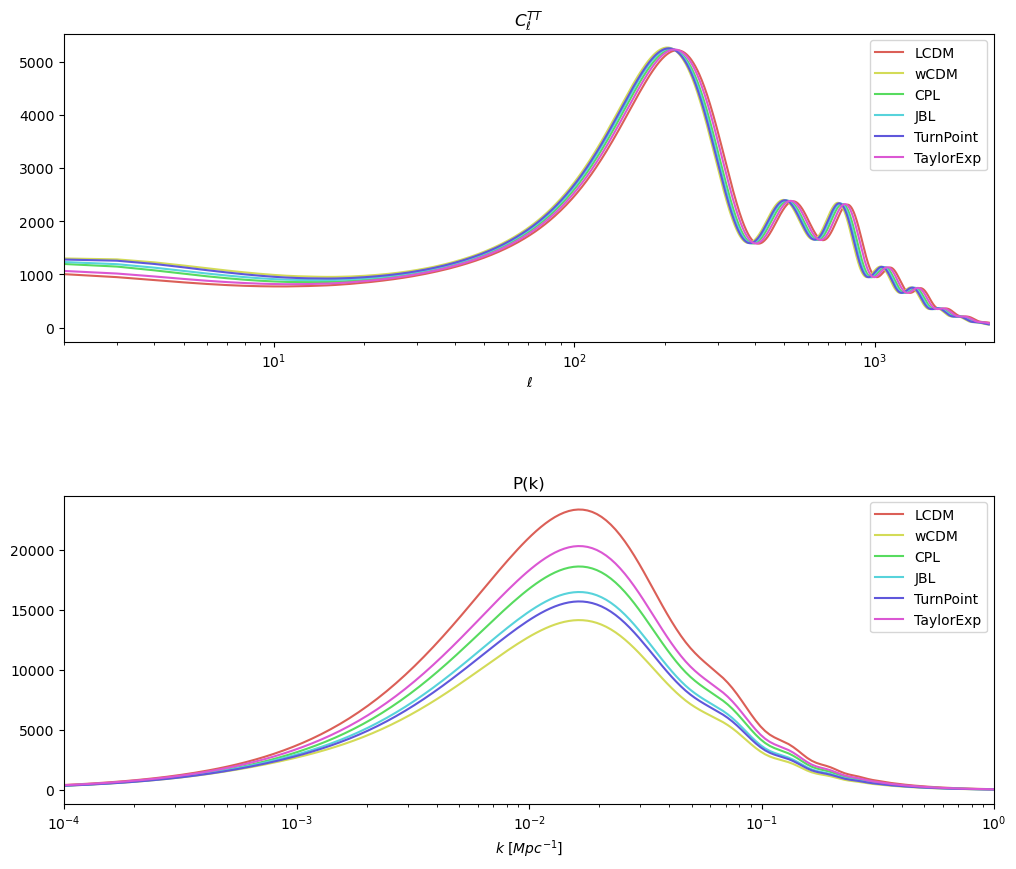

In [21]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

for CLS, KH, PK, c, key in zip(toplot_totCL_DE, toplot_matter_DE_kh, toplot_matter_DE_pk, color, PureEFT_DE_model):
    ls = np.arange(CLS.shape[0])
    ax[0].semilogx(ls,CLS[:,0], color=c,label= key)
    ax[1].semilogx(KH,PK, color=c,label=key)

ax[0].set_title('$C_{\ell}^{TT}$',pad=5)
ax[1].set_title(r'P(k)')
ax[0].set_xlabel('$\ell$')
ax[1].set_xlabel('$k\ [Mpc^{-1}]$')
ax[0].legend()
ax[1].legend()
ax[0].set_xlim([2,2500])
ax[1].set_xlim([0.0001,1])

plt.subplots_adjust(hspace=0.5)


***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Jan26
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           3
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  F
  Positivity bounds      =  F
  Minkowski limit    

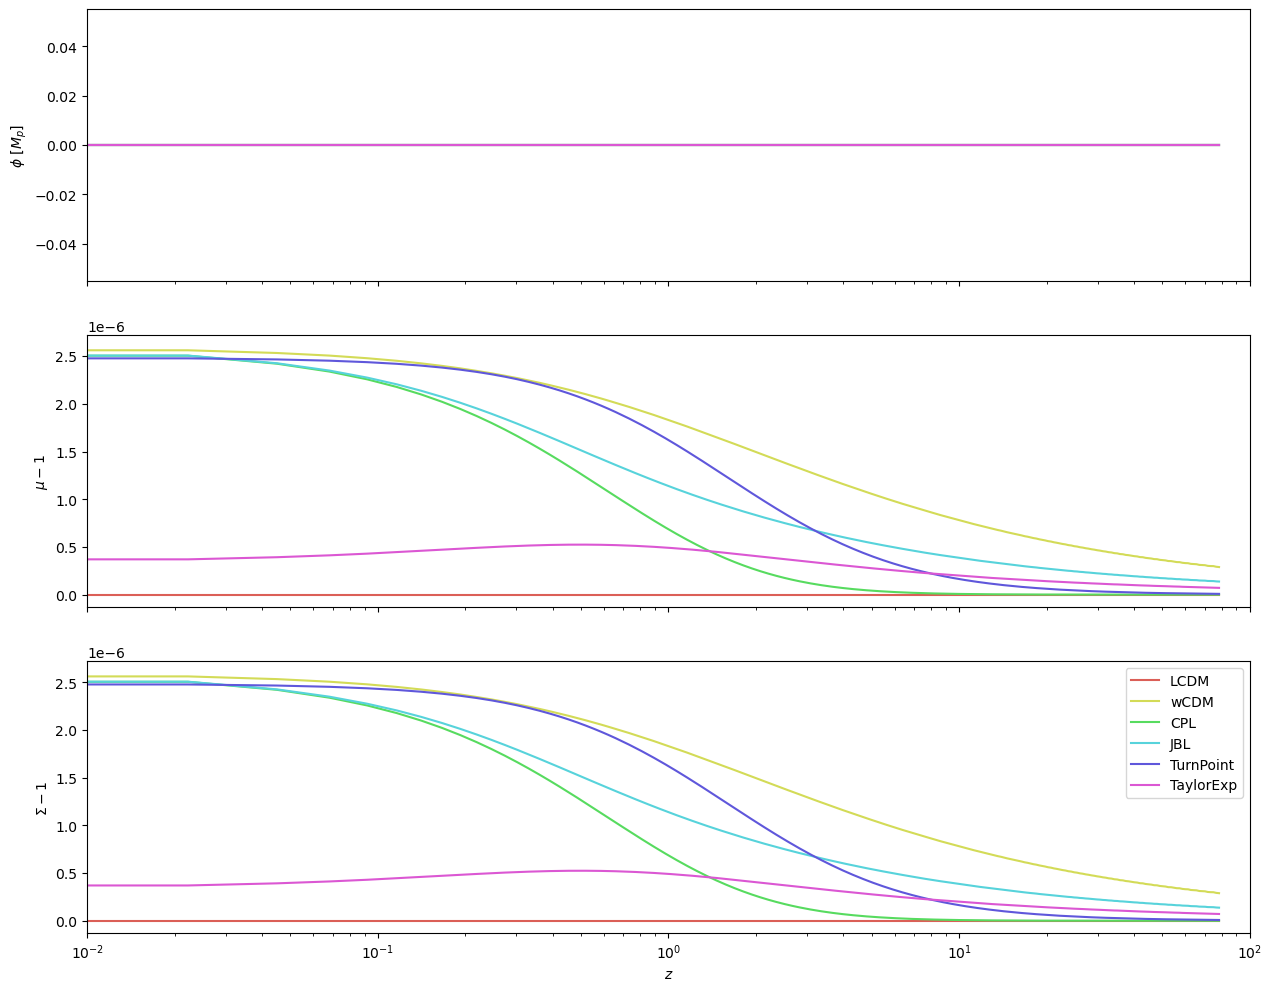

In [22]:
toplot_phi = []
toplot_mu = []
toplot_sgm = []

for EFTpar in PureEFT_DE_model:
    
    # EFT1 = camb.CAMBparams()
    # EFT1.set_cosmology(H0=67.3, EFTCAMB_params=PureEFT_DE_model[EFTpar])
    # print('EFTpar:',EFTpar)
    EFT1 = camb.set_params(H0=67.3, **PureEFT_DE_model[EFTpar])
    EFT1.NonLinear = model.NonLinear_none
    results1 = camb.get_results(EFT1)

    nms, vls = EFT1.EFTCAMB.get_scale_evolution(results1, 0.1, a_vec)

    toplot_phi.append(vls['phi_scf'][0])
    toplot_mu.append(vls['mu'][0])
    toplot_sgm.append(vls['sigma_eft'][0])

fig, ax = plt.subplots(3,1, figsize = (15,12),sharex=True)

for phi, mu, sgm, c, key in zip(toplot_phi, toplot_mu, toplot_sgm, color, PureEFT_DE_model):
    
    ax[0].plot(1/a_vec-1, phi, color=c,label=key)
    ax[1].plot(1/a_vec-1, mu-1, color=c,label=key)
    ax[2].plot(1/a_vec-1, sgm-1, color=c,label=key)

    ax[0].set_ylabel(r'$\phi \ [M_p]$')
    ax[1].set_ylabel(r'$\mu - 1$')
    ax[2].set_ylabel(r'$\Sigma - 1$')


ax[2].set_xlabel(r'$z$')
ax[2].set_xlim([1e-2,1e2])
ax[2].set_xscale('log')
# ax[2].set_xticks([0.1, 1, 10, 1e3, 3500, 1e5], [0.1, 1, 10, "$10^3$", r"$z_{\rm eq} = 3500$", "$10^5$"])


plt.legend(fontsize=10)
plt.show()